In [ ]:
import numpy as np
import tensorflow as tf
import random

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import sequence
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [ ]:
# Load the IMDB dataset
num_words = 10000
maxlen = 500

(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Testing samples: 25000


In [ ]:
# Decode the first review to understand the data
word_index = keras.datasets.imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(X_train[0]))
print(f"Label: {y_train[0]}")


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these c

In [ ]:
# Pad sequences to ensure uniform length
X_train_padded = sequence.pad_sequences(X_train, maxlen=maxlen, padding='post', truncating='post')
X_test_padded = sequence.pad_sequences(X_test, maxlen=maxlen, padding='post', truncating='post')

print(f"Padded training data shape: {X_train_padded.shape}")
print(f"Padded testing data shape: {X_test_padded.shape}")


Padded training data shape: (25000, 500)
Padded testing data shape: (25000, 500)


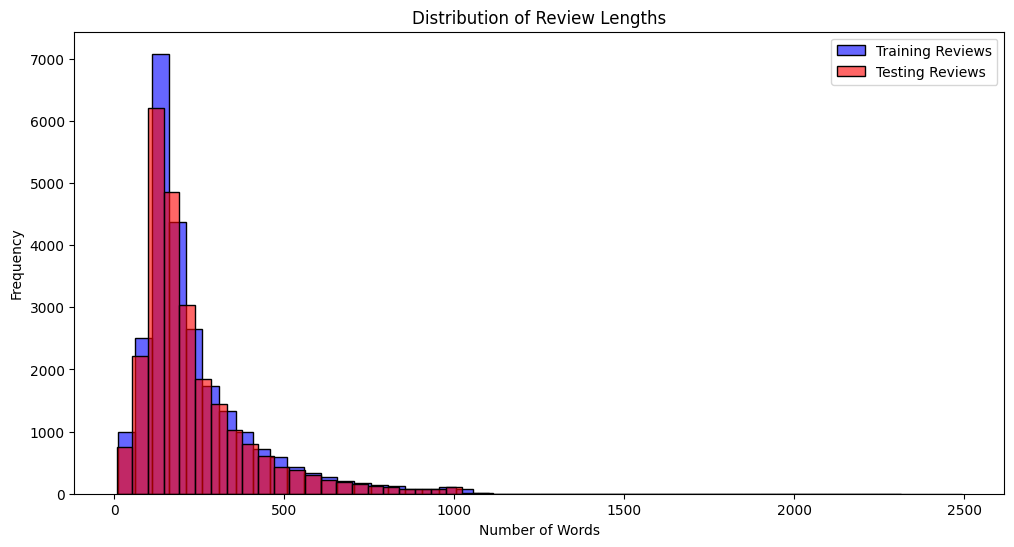

In [ ]:
# Function to calculate review lengths
def review_length(review):
    return len(review)

train_lengths = [review_length(review) for review in X_train]
test_lengths = [review_length(review) for review in X_test]

# Plot distribution
plt.figure(figsize=(12,6))
sns.histplot(train_lengths, bins=50, color='blue', label='Training Reviews', alpha=0.6)
sns.histplot(test_lengths, bins=50, color='red', label='Testing Reviews', alpha=0.6)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define model architecture without `input_length` and specifying `input_shape`
model = keras.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=128, input_shape=(maxlen,)),
    layers.LSTM(128, dropout=0.2),
    layers.Dense(1, activation='sigmoid')
])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,411,713 (5.39 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train_padded,
    y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.5478 - loss: 0.6381 - val_accuracy: 0.5098 - val_loss: 0.7813
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5455 - loss: 0.6358 - val_accuracy: 0.5004 - val_loss: 0.7467
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5425 - loss: 0.6383 - val_accuracy: 0.5120 - val_loss: 0.7632
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.5496 - loss: 0.6364 - val_accuracy: 0.5096 - val_loss: 0.7792
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.5475 - loss: 0.6353 - val_accuracy: 0.5100 - val_loss: 0.7967
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.5456 - loss: 0.6357 - val_accuracy: 0.5098 - val_loss: 0.7908
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.5496 - loss: 0.6342 - val_accuracy: 0.5136 - val_loss: 0.7949
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.5464 - loss: 0.6345 - val_

782/782 - 9s - 12ms/step - accuracy: 0.8583 - loss: 0.3843

Test Loss: 0.3843006193637848
Test Accuracy: 0.8582800030708313
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     12500
           1       0.87      0.85      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



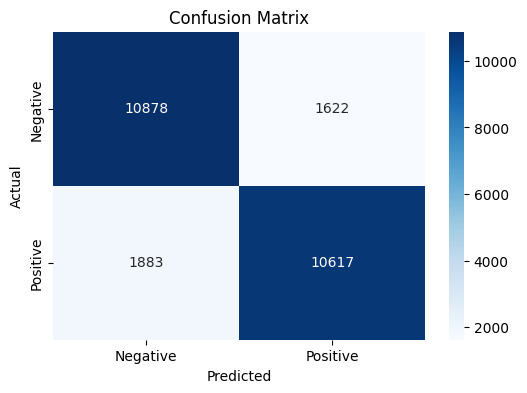

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test, verbose=2)
print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Classification Report
y_pred_prob = model.predict(X_test_padded, batch_size=64)
y_pred = (y_pred_prob > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


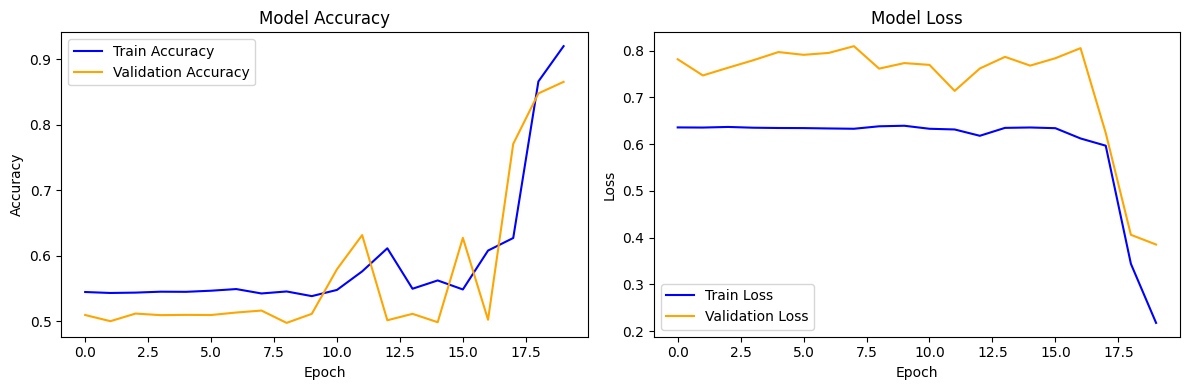

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def predict_sentiment(review):
    # Tokenize the review
    word_to_id = keras.datasets.imdb.get_word_index()
    word_to_id = {k:(v+3) for k,v in word_to_id.items()}
    word_to_id["<PAD>"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2
    word_to_id["<UNUSED>"] = 3
    id_to_word = {value: key for key, value in word_to_id.items()}

    # Convert words to IDs
    tokens = keras.preprocessing.text.text_to_word_sequence(review)
    encoded = [1]  # start with <START>
    for word in tokens:
        if word in word_to_id and word_to_id[word] < num_words:
            encoded.append(word_to_id[word])
        else:
            encoded.append(2)  # <UNK>

    # Pad the sequence
    padded = sequence.pad_sequences([encoded], maxlen=maxlen, padding='post', truncating='post')

    # Predict
    prediction = model.predict(padded)[0][0]
    sentiment = 'Positive' if prediction > 0.5 else 'Negative'
    return sentiment, prediction

# Example Prediction
new_review = "I absolutely loved this movie! The performances were fantastic and the story was gripping."
sentiment, probability = predict_sentiment(new_review)
print(f"Review: {new_review}")
print(f"Predicted Sentiment: {sentiment} (Probability: {probability:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Review: I absolutely loved this movie! The performances were fantastic and the story was gripping.
Predicted Sentiment: Positive (Probability: 0.9703)
